# Gradient descent and stochastic gradient descent from scratch

In the previous tutorials,
we decided *which direction* to move each parameter
and *how much* to move each parameter
by taking the gradient of the loss with respect to each parameter.
We also scaled each gradient by some learning rate, 
although we never really explained where this number comes from.
We then updated the parameters by performing a gradient step $\theta_{t+1} \gets \eta \nabla_{\theta}\mathcal{L}_t$. 
Each update is called a *gradient step*
and the process is called *gradient descent*.

The hope is that if we just take a whole lot of gradient steps,
we'll wind up with an awesome model that gets very low loss on our training data,
and that this performance might generalize to our hold-out data. 
But as a sharp reader, you might have any number of doubts. You might wonder, for instance: 

* Why does gradient descent work?
* Why doesn't the gradient descent algorithm get stuck on the way to a low loss?
* How should we choose a learning rate?
* Do all the parameters need to share the same learning rate?
* Is there anything we can do to speed up the process?
* Why does the solution of gradient descent over training data generalize well to test data?

Some answers to these questions are known. 
For other questions, we have some answers but only for simple models like logistic regression that are easy to analyze.
And for some of these questions, we know of best practices that seem to work even if they're not supported by any conclusive mathematical analysis. 
Optimization is a rich area of ongoing research. 
In this chapter, we'll address the parts that are most relevant for training neural networks. 
To begin, let's take a more formal look at gradient descent.

## Gradient descent in one dimension

To get going, consider a simple scenario in which we have one parameter to manipulate.
Let's also assume that our objective associates every value of this parameter with a value.
Formally, we can say that this objective function has the signature $f: \mathbb{R} \rightarrow \mathbb{R}$.
It maps from one real number to another.

Note that the domain of $f$ is in one-dimensional. According to its Taylor series expansion as shown in the [introduction chapter](./optimization-intro.ipynb), we have

$$f(x + \epsilon) \approx f(x) + f'(x) \epsilon.$$

Substituting $\epsilon$ with $-\eta f'(x)$ where $\eta$ is a constant, we have

$$f(x - \eta f'(x)) \approx f(x) -  \eta f'(x)^2.$$

If $\eta$ is set as a small positive value, we obtain

$$f(x - \eta f'(x)) \leq f(x).$$

In other words, updating $x$ as 

$$x := x - \eta f'(x)$$ 

may reduce the value of $f(x)$ if its current derivative value $f'(x) \neq 0$. Since the derivative $f'(x)$ is a special case of gradient in one-dimensional domain, the above update of $x$ is gradient descent in one-dimensional domain.

The positive scalar $\eta$ is called the learning rate or step size. Note that a larger learning rate increases the chance of overshooting the global minimum and oscillating. However, if the learning rate is too small, the convergence can be very slow. In practice, a proper learning rate is usually selected with experiments.

## Gradient descent  over multi-dimensional parameters

Consider the objective function $f: \mathbb{R}^d \rightarrow \mathbb{R}$ 
that takes any multi-dimensional vector $\mathbf{x} = [x_1, x_2, \ldots, x_d]^\top$ as its input. 
The gradient of $f(\mathbf{x})$ with respect to $\mathbf{x}$ is defined by the vector of partial derivatives: 

$$\nabla_\mathbf{x} f(\mathbf{x}) = \bigg[\frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots, \frac{\partial f(\mathbf{x})}{\partial x_d}\bigg]^\top.$$

To keep our notation compact we may use the notation $\nabla f(\mathbf{x})$ and $\nabla_\mathbf{x} f(\mathbf{x})$ 
interchangeably when there is no ambiguity about which parameters we are optimizing over.
In plain English, each element $\partial f(\mathbf{x})/\partial x_i$ of the gradient 
indicates the rate of change for $f$ at the point $\mathbf{x}$ 
with respect to the input $x_i$ only. 
To measure the rate of change of $f$ in any direction 
that is represented by a unit vector $\mathbf{u}$, 
in multivariate calculus, we define the directional derivative of $f$ at $\mathbf{x}$ 
in the direction of $\mathbf{u}$ as

$$D_\mathbf{u} f(\mathbf{x}) = \lim_{h \rightarrow 0}  \frac{f(\mathbf{x} + h \mathbf{u}) - f(\mathbf{x})}{h},$$

which can be rewritten according to the chain rule as

$$D_\mathbf{u} f(\mathbf{x}) =  \mathbf{u} \cdot \nabla f(\mathbf{x}).$$

Since $D_\mathbf{u} f(\mathbf{x})$ gives the rates of change of $f$ at the point $\mathbf{x}$ 
in all possible directions, to minimize $f$, 
we are interested in finding the direction where $f$ can be reduced fastest. 
Thus, we can minimize the directional derivative $D_\mathbf{u} f(\mathbf{x})$ with respect to $\mathbf{u}$. 
Since $D_\mathbf{u} f(\mathbf{x}) = \|\mathbf{u}\| \cdot \|\nabla f(\mathbf{x})\| \cdot \text{cos} (\theta) = \|\nabla f(\mathbf{x})\|  \cdot \text{cos} (\theta)$, 
where $\theta$ is the angle between $\nabla f(\mathbf{x})$ 
and $\mathbf{u}$, the minimum value of $\text{cos}(\theta)$ is -1 when $\theta = \pi$. 
Therefore, $D_\mathbf{u} f(\mathbf{x})$ is minimized 
when $\mathbf{u}$ is at the opposite direction of the gradient $\nabla f(\mathbf{x})$. 
Now we can iteratively reduce the value of $f$ with the following gradient descent update:

$$\mathbf{x} := \mathbf{x} - \eta \nabla f(\mathbf{x}),$$

where the positive scalar $\eta$ is called the learning rate or step size.

## Stochastic gradient descent

However, the gradient descent algorithm may be infeasible when the training data size is huge. Thus, a stochastic version of the algorithm is often used instead. 

To motivate the use of stochastic optimization algorithms, note that when training deep learning models, we often consider the objective function as a sum of a finite number of functions:

$$f(\mathbf{x}) = \frac{1}{n} \sum_{i = 1}^n f_i(\mathbf{x}),$$

where $f_i(\mathbf{x})$ is a loss function based on the training data instance indexed by $i$. It is important to highlight that the per-iteration computational cost in gradient descent scales linearly with the training data set size $n$. Hence, when $n$ is huge, the per-iteration computational cost of gradient descent is very high.

In view of this, stochastic gradient descent offers a lighter-weight solution. At each iteration, rather than computing the gradient $\nabla f(\mathbf{x})$, stochastic gradient descent randomly samples $i$ at uniform and computes $\nabla f_i(\mathbf{x})$ instead. The insight is, stochastic gradient descent uses $\nabla f_i(\mathbf{x})$ as an unbiased estimator of $\nabla f(\mathbf{x})$ since

$$\mathbb{E}_i \nabla f_i(\mathbf{x}) = \frac{1}{n} \sum_{i = 1}^n \nabla f_i(\mathbf{x}) = \nabla f(\mathbf{x}).$$


In a generalized case, at each iteration a mini-batch $\mathcal{B}$ that consists of indices for training data instances may be sampled at uniform with replacement. 
Similarly, we can use 

$$\nabla f_\mathcal{B}(\mathbf{x}) = \frac{1}{|\mathcal{B}|} \sum_{i \in \mathcal{B}}\nabla f_i(\mathbf{x})$$ 

to update $\mathbf{x}$ as

$$\mathbf{x} := \mathbf{x} - \eta \nabla f_\mathcal{B}(\mathbf{x}),$$

where $|\mathcal{B}|$ denotes the cardinality of the mini-batch and the positive scalar $\eta$ is the learning rate or step size. Likewise, the mini-batch stochastic gradient $\nabla f_\mathcal{B}(\mathbf{x})$ is an unbiased estimator for the gradient $\nabla f(\mathbf{x})$:

$$\mathbb{E}_\mathcal{B} \nabla f_\mathcal{B}(\mathbf{x}) = \nabla f(\mathbf{x}).$$

This generalized stochastic algorithm is also called mini-batch stochastic gradient descent and we simply refer to them as stochastic gradient descent (as generalized). The per-iteration computational cost is $\mathcal{O}(|\mathcal{B}|)$. Thus, when the mini-batch size is small, the computational cost at each iteration is light.

There are other practical reasons that may make stochastic gradient descent more appealing than gradient descent. If the training data set has many redundant data instances, stochastic gradients may be so close to the true gradient $\nabla f(\mathbf{x})$ that a small number of iterations will find useful solutions to the optimization problem. In fact, when the training data set is large enough, stochastic gradient descent only requires a small number of iterations to find useful solutions such that the total computational cost is lower than that of gradient descent even for just one iteration. Besides, stochastic gradient descent can be considered as offering a regularization effect especially when the mini-batch size is small due to the randomness and noise in the mini-batch sampling. Moreover, certain hardware processes mini-batches of specific sizes more efficiently.

## Experiments

For demonstrating the aforementioned gradient-based optimization algorithms, we use the regression problem in the [linear regression chapter](../chapter02_supervised-learning/linear-regression-scratch.ipynb) as a case study.

In [1]:
# Mini-batch stochastic gradient descent.
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

In [2]:
import mxnet as mx
from mxnet import autograd
from mxnet import ndarray as nd
from mxnet import gluon
import random

mx.random.seed(1)
random.seed(1)

# Generate data.
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
X = nd.random_normal(scale=1, shape=(num_examples, num_inputs))
y = true_w[0] * X[:, 0] + true_w[1] * X[:, 1] + true_b
y += .01 * nd.random_normal(scale=1, shape=y.shape)
dataset = gluon.data.ArrayDataset(X, y)

# Construct data iterator.
import random
def data_iter(batch_size):
    idx = list(range(num_examples))
    random.shuffle(idx)
    for batch_i, i in enumerate(range(0, num_examples, batch_size)):
        j = nd.array(idx[i: min(i + batch_size, num_examples)])
        yield batch_i, X.take(j), y.take(j)

# Initialize model parameters.
def init_params():
    w = nd.random_normal(scale=1, shape=(num_inputs, 1))
    b = nd.zeros(shape=(1,))
    params = [w, b]
    for param in params:
        param.attach_grad()
    return params

# Linear regression.
def net(X, w, b):
    return nd.dot(X, w) + b

# Loss function.
def square_loss(yhat, y):
    return (yhat - y.reshape(yhat.shape)) ** 2 / 2

In [3]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120
import matplotlib.pyplot as plt
import numpy as np

def train(batch_size, lr, epochs, period):
    assert period >= batch_size and period % batch_size == 0
    w, b = init_params()
    total_loss = [np.mean(square_loss(net(X, w, b), y).asnumpy())]
    # Epoch starts from 1.
    for epoch in range(1, epochs + 1):
        # Decay learning rate.
        if epoch > 2:
            lr *= 0.1
        for batch_i, data, label in data_iter(batch_size):
            with autograd.record():
                output = net(data, w, b)
                loss = square_loss(output, label)
            loss.backward()
            sgd([w, b], lr, batch_size)
            if batch_i * batch_size % period == 0:
                total_loss.append(
                    np.mean(square_loss(net(X, w, b), y).asnumpy()))
        print("Batch size %d, Learning rate %f, Epoch %d, loss %.4e" % 
              (batch_size, lr, epoch, total_loss[-1]))
    print('w:', np.reshape(w.asnumpy(), (1, -1)), 
          'b:', b.asnumpy()[0], '\n')
    x_axis = np.linspace(0, epochs, len(total_loss), endpoint=True)
    plt.semilogy(x_axis, total_loss)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

Batch size 1, Learning rate 0.200000, Epoch 1, loss 5.5937e-05
Batch size 1, Learning rate 0.200000, Epoch 2, loss 8.0473e-05
Batch size 1, Learning rate 0.020000, Epoch 3, loss 4.9757e-05
w: [[ 1.99949276 -3.39981604]] b: 4.19997 



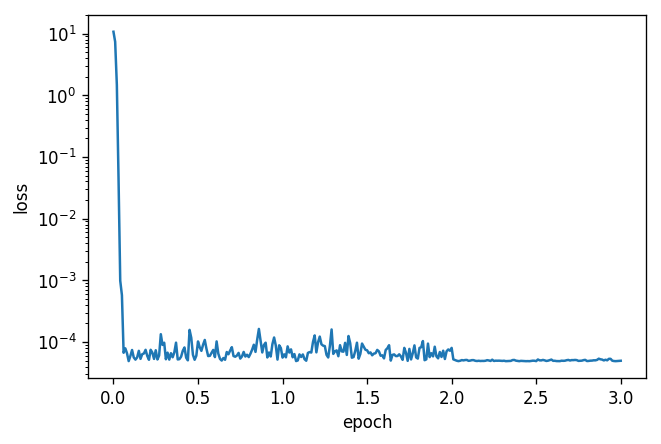

In [4]:
train(batch_size=1, lr=0.2, epochs=3, period=10)

Batch size 1000, Learning rate 0.999000, Epoch 1, loss 1.1561e-01
Batch size 1000, Learning rate 0.999000, Epoch 2, loss 8.4421e-04
Batch size 1000, Learning rate 0.099900, Epoch 3, loss 6.9547e-04
w: [[ 2.00893021 -3.36536145]] b: 4.19384 



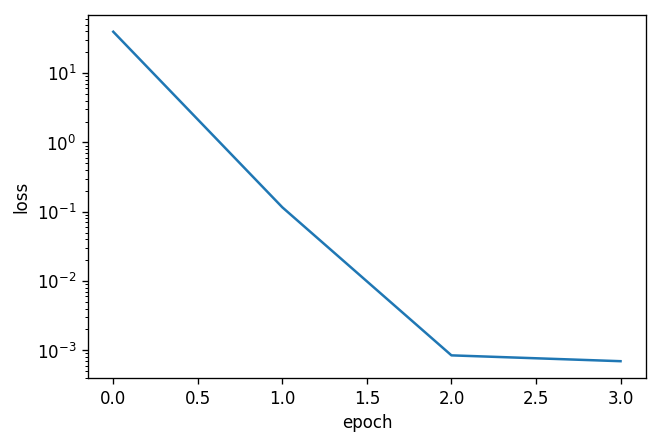

In [5]:
train(batch_size=1000, lr=0.999, epochs=3, period=1000)

Batch size 10, Learning rate 0.200000, Epoch 1, loss 4.9184e-05
Batch size 10, Learning rate 0.200000, Epoch 2, loss 4.9389e-05
Batch size 10, Learning rate 0.020000, Epoch 3, loss 4.8990e-05
w: [[ 1.99998689 -3.39983392]] b: 4.20028 



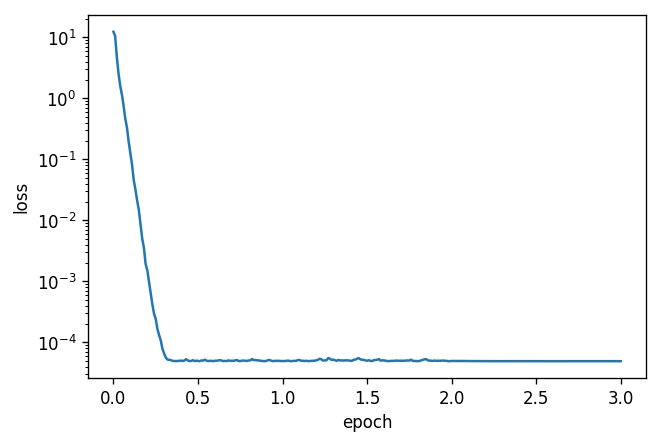

In [6]:
train(batch_size=10, lr=0.2, epochs=3, period=10)

Batch size 10, Learning rate 5.000000, Epoch 1, loss nan
Batch size 10, Learning rate 5.000000, Epoch 2, loss nan
Batch size 10, Learning rate 0.500000, Epoch 3, loss nan
w: [[ nan  nan]] b: nan 



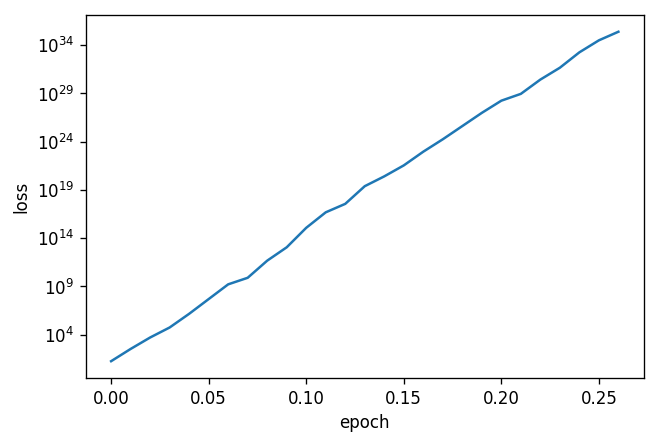

In [7]:
train(batch_size=10, lr=5, epochs=3, period=10)

Batch size 10, Learning rate 0.002000, Epoch 1, loss 9.1294e+00
Batch size 10, Learning rate 0.002000, Epoch 2, loss 6.1059e+00
Batch size 10, Learning rate 0.000200, Epoch 3, loss 5.8656e+00
w: [[ 0.9720636  -1.67973936]] b: 1.42253 



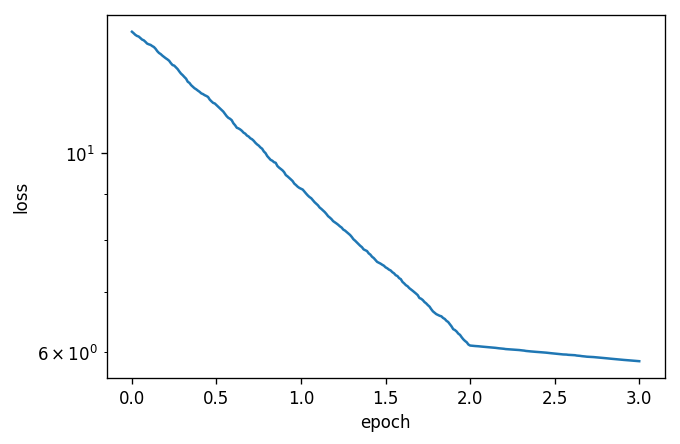

In [8]:
train(batch_size=10, lr=0.002, epochs=3, period=10)

## Next
[SGD with momentum](../chapter06_optimization/sgd-momentum.ipynb)

For whinges or inquiries, [open an issue on  GitHub.](https://github.com/zackchase/mxnet-the-straight-dope)